# Part I - Loan Data Analysis from Prosper Loans
## by Stetson Done

## Introduction

>This analysis will dive into a loan dataset from Prosper (a personal loan company). The raw dataset contains information about 113,937 loans with 81 variables about each loan. The dataset was acquired through Udacity, but can be found on kaggle.com at https://www.kaggle.com/yousuf28/prosper-loan. 


## Preliminary Wrangling

>All data wrangling and cleaning was completed in a separate notebook prior to this analysis. See data_wrangling_and_cleaning.ipynb for details.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
# loads cleaned master loan df into df from csv file created in data_wrangling_and_cleaning.ipynb
df = pd.read_csv(r"C:\Users\14802\Desktop\DATA_PROJECTS\udacity_projects\Loan_Data_Visualization\master_loan_data.csv", index_col=False, low_memory=False)

In [3]:
df.head()

,member_key,borrower_state,income_range,income_verifiable,debt_to_income_ratio,occupation,employment_status,employment_status_duration,is_borrower_homeowner,credit_score_range_lower,...,closed_date,is_loan_delinquent,loan_current_days_delinquent,loan_months_since_origination,lender_yield,estimated_effective_yield,estimated_loss,estimated_return,l_p__gross_principal_loss,l_p__net_principal_loss
0,1F3E3376408759268057EDA,CO,"$25,000-49,999",1,0.17,Other,Self-employed,2.0,1,640.0,...,2009-08-14,0,0,78,0.1380,NaN,NaN,NaN,0.0,0.0
1,1D13370546739025387B2F4,CO,"$50,000-74,999",1,0.18,Professional,Employed,44.0,1,680.0,...,NaN,0,0,0,0.0820,0.07960,0.0249,0.05470,0.0,0.0
2,5F7033715035555618FA612,GA,Not displayed,1,0.06,Other,Not available,NaN,1,480.0,...,2009-12-17,0,0,86,0.2400,NaN,NaN,NaN,0.0,0.0
3,9ADE356069835475068C6D2,GA,"$25,000-49,999",1,0.15,Skilled Labor,Employed,113.0,1,800.0,...,NaN,0,0,16,0.0874,0.08490,0.0249,0.06000,0.0,0.0
4,36CE356043264555721F06C,MN,"$100,000+",1,0.26,Executive,Employed,44.0,1,680.0,...,NaN,0,0,6,0.1985,0.18316,0.0925,0.09066,0.0,0.0


In [4]:
df.shape

(113937, 46)

In [5]:
# loads cleaned loan info df into df from csv file created in data_wrangling_and_cleaning.ipynb
loan_info_df = pd.read_csv(r"C:\Users\14802\Desktop\DATA_PROJECTS\udacity_projects\Loan_Data_Visualization\loan_data.csv", index_col=False, low_memory=False)

## About the dataset

> The master dataset has 46 columns and 113,937 rows of data about borrowers and loans.
  
>The main features in the dataset ia the borrower information such as credit score and income as well as loan information such as whether the loan is delinquent or has been closed. 

> These features will support an investigation into what the average borrower's average loan looks like as well as what factors potentially increase or decrease the likelihood of becoming delinquent on a loan.

## Univariate Exploration

>I'll begin the univariate exploration by getting an overall picture of borrowers' financial information, then getting an picture of the overall loan information.

### Exploratory Question #1 - 



>What is the distribution of borrowers' credit scores?

In [6]:
df.credit_score_range_lower.describe()

count    113346.000000
mean        685.567731
std          66.458275
min           0.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: credit_score_range_lower, dtype: float64

### Visualization #1 - 

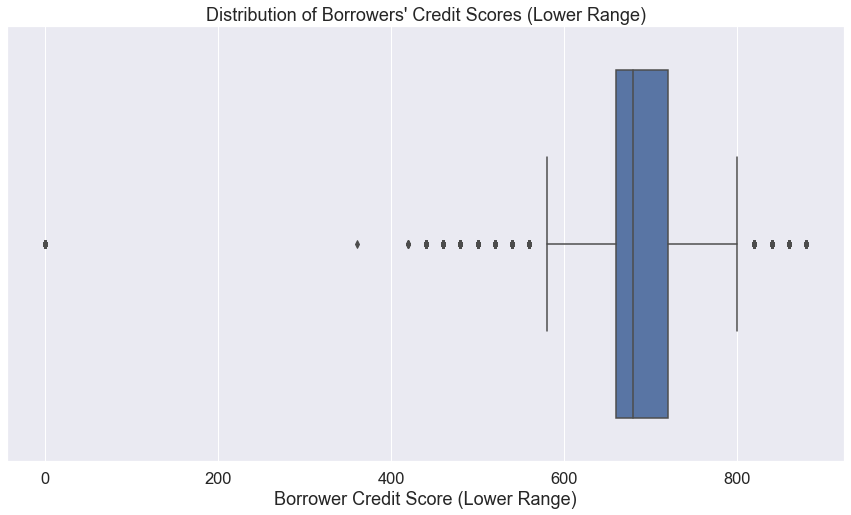

In [7]:
sns.set_theme(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(15,8))

ax1 = sns.boxplot(x=df['credit_score_range_lower'])


ax1.set_xlabel("Borrower Credit Score (Lower Range)")
ax1.set_title("Distribution of Borrowers' Credit Scores (Lower Range)");


In [8]:
df.credit_score_range_upper.describe()

count    113346.000000
mean        704.567731
std          66.458275
min          19.000000
25%         679.000000
50%         699.000000
75%         739.000000
max         899.000000
Name: credit_score_range_upper, dtype: float64

### Visualization #2 - 

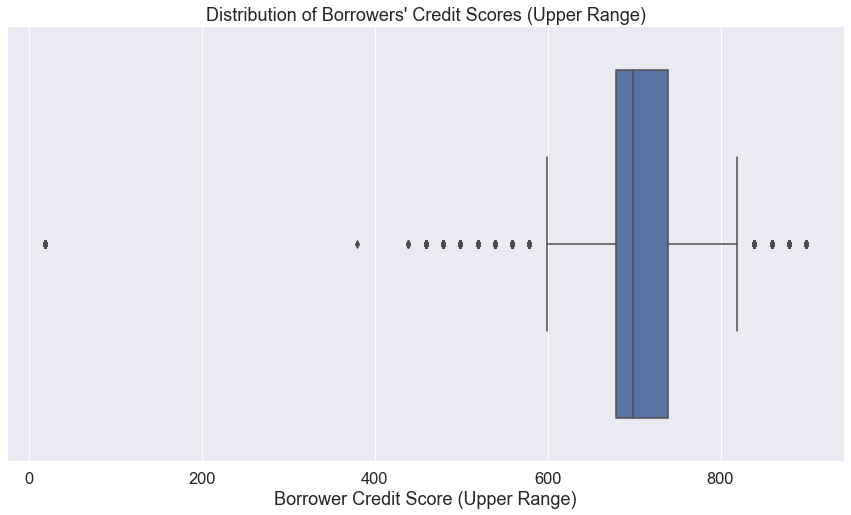

In [9]:
sns.set_theme(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(15,8))

ax1 = sns.boxplot(x=df['credit_score_range_upper'])


ax1.set_xlabel("Borrower Credit Score (Upper Range)")
ax1.set_title("Distribution of Borrowers' Credit Scores (Upper Range)");

### Observation

>Both lower and upper credit limit ranges have a narrow distribution, with a lower mean of 685 and an upper mean of 704. Both lower and upper ranges had a standard deviation of 66.

### Exploratory Question #2 - 

>What is does the income distribution of borrower's look like?

In [10]:
borrower_income = df.groupby(['income_range']).size()

In [11]:
borrower_income = pd.DataFrame(borrower_income)
borrower_income.reset_index(inplace=True)
borrower_income.columns = ['income_range', 'total_borrowers']

In [12]:
borrower_income

,income_range,total_borrowers
0,$0,621
1,"$1-24,999",7274
2,"$100,000+",17337
3,"$25,000-49,999",32192
4,"$50,000-74,999",31050
5,"$75,000-99,999",16916
6,Not displayed,7741
7,Not employed,806


In [13]:
borrower_income

,income_range,total_borrowers
0,$0,621
1,"$1-24,999",7274
2,"$100,000+",17337
3,"$25,000-49,999",32192
4,"$50,000-74,999",31050
5,"$75,000-99,999",16916
6,Not displayed,7741
7,Not employed,806


In [14]:
borrower_income.drop([6,7], inplace=True)
borrower_income

,income_range,total_borrowers
0,$0,621
1,"$1-24,999",7274
2,"$100,000+",17337
3,"$25,000-49,999",32192
4,"$50,000-74,999",31050
5,"$75,000-99,999",16916


In [15]:
borrower_income = borrower_income.reindex(index=[0,1,3,4,5,2])

### Visualization #3

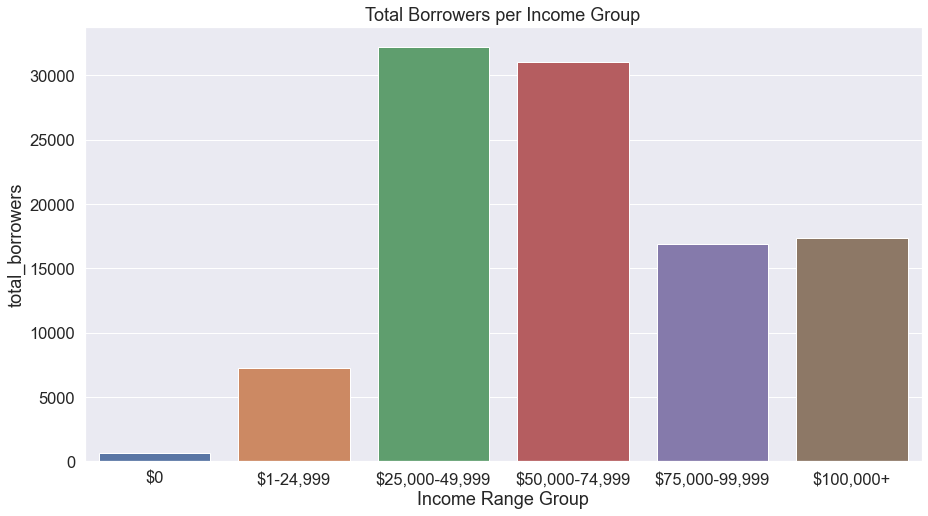

In [16]:
sns.set_theme(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(15,8))

ax1 = sns.barplot(data=borrower_income, x='income_range', y='total_borrowers')


ax1.set_xlabel("Income Range Group")
ax1.set_title("Total Borrowers per Income Group");

### Observation

>The majority of borrowers are making 25,000 - 74,999 dollars per year.  

### Exploratory Question #3 -

>What is the average debt to income ratio for borrowers?

In [17]:
df['debt_to_income_ratio'].describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: debt_to_income_ratio, dtype: float64

### Visualization #4 

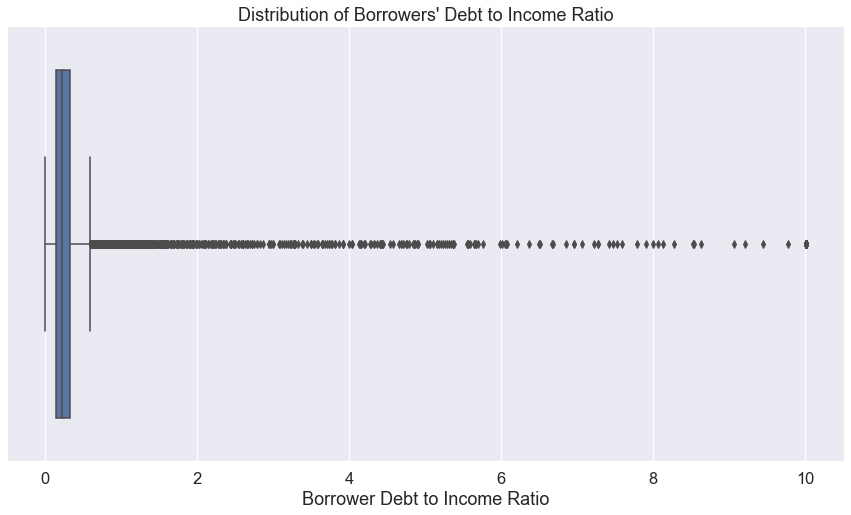

In [18]:
sns.set_theme(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(15,8))

ax1 = sns.boxplot(x=df['debt_to_income_ratio'])


ax1.set_xlabel("Borrower Debt to Income Ratio")
ax1.set_title("Distribution of Borrowers' Debt to Income Ratio");

### Observation

> From the documentation provided to decribe the data set, the debt to income ratio is "The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%)." - - Seeing this box plot, I first thought the high numbers but be incorrect data, but it seems from the data description, these ratios really can be up to 1000% for debt to income ratio. The median, however, is 22%.

### Exploratory Question #4 -

>How many open revolving accounts did borrowers have on average?

In [19]:
df['open_revolving_accounts'].describe()

count    113937.00000
mean          6.96979
std           4.63097
min           0.00000
25%           4.00000
50%           6.00000
75%           9.00000
max          51.00000
Name: open_revolving_accounts, dtype: float64

### Visualization #5

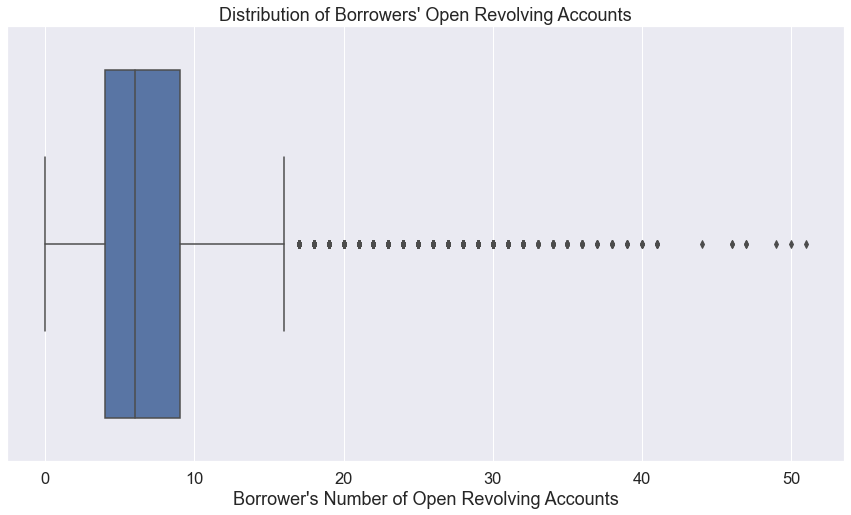

In [20]:
sns.set_theme(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(15,8))

ax1 = sns.boxplot(x=df['open_revolving_accounts'])


ax1.set_xlabel("Borrower's Number of Open Revolving Accounts")
ax1.set_title("Distribution of Borrowers' Open Revolving Accounts");

### Observation

> The average (mean) number of open revolving accounts was 6.9 and the median was 6. There do appear to be several outliers, with the max number of open revolving accounts as 51.

### Exploratory Question #5

> What was the average number of delinquencies in the last 7 years per borrower at the time the credit was pulled?

In [21]:
df['delinquencies_last7_years'].describe()

count    112947.000000
mean          4.154984
std          10.160216
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          99.000000
Name: delinquencies_last7_years, dtype: float64

### Visualization #6

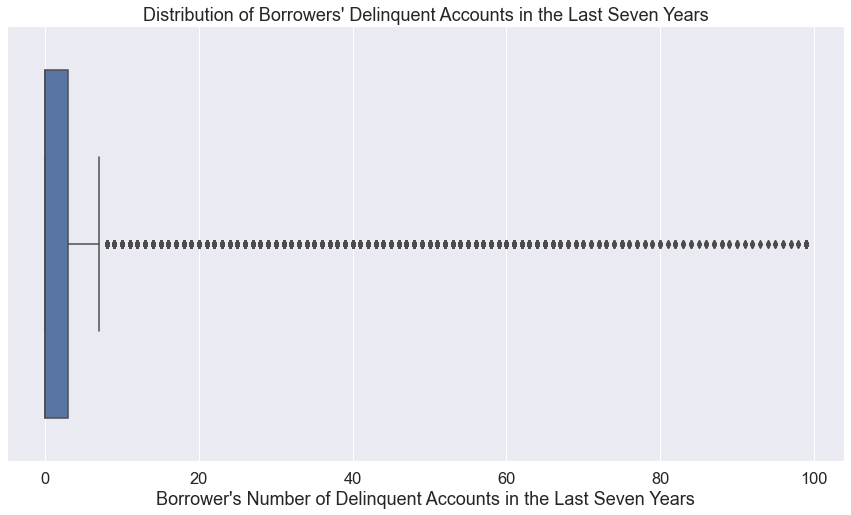

In [22]:
sns.set_theme(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(15,8))

ax1 = sns.boxplot(x=df['delinquencies_last7_years'])


ax1.set_xlabel("Borrower's Number of Delinquent Accounts in the Last Seven Years")
ax1.set_title("Distribution of Borrowers' Delinquent Accounts in the Last Seven Years");

### Observation

>It looks like most borrowers did not have delinquencies in the last seven years, although the mean (4 accounts delinquent) looks to be heavily affected by the number of outliers. 

### Exploratory Question #6 - 

>What were borrowers' average monthly loan payments?

In [23]:
df['monthly_loan_payment'].describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: monthly_loan_payment, dtype: float64

### Visualization #7

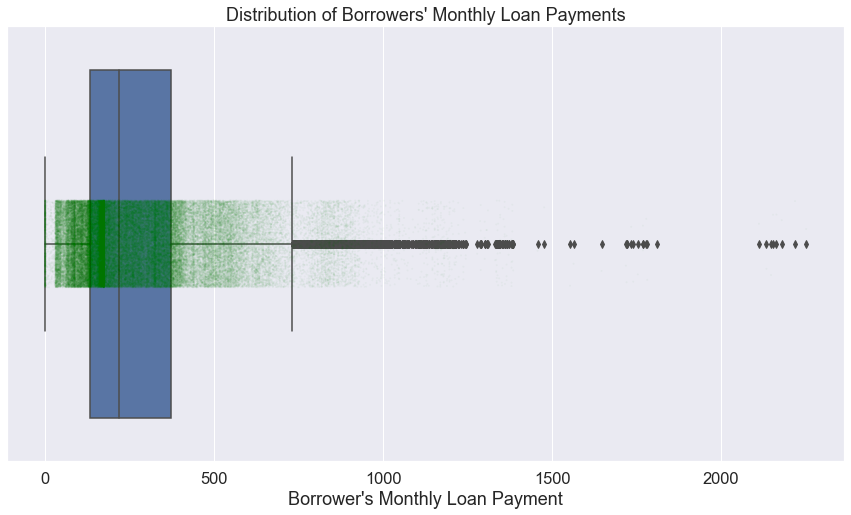

In [24]:
sns.set_theme(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(15,8))

ax1 = sns.boxplot(x=df['monthly_loan_payment'])
sns.stripplot(x=df['monthly_loan_payment'], color='green', alpha=0.03, size=2)

ax1.set_xlabel("Borrower's Monthly Loan Payment")
ax1.set_title("Distribution of Borrowers' Monthly Loan Payments");

### Observation

>The green dots in this graph are the individual data points plotted on top of the box chart. I like how it visualizes the density of the data points. The mean monthly loan payment was 272 and the median monthly loan payment was 217. 

### Exploratory Question #7 -

>How many borrowers were home owners vs non-homeowners?

In [25]:
homeowners = df.groupby('is_borrower_homeowner').size()

In [26]:
homeowners = pd.DataFrame(homeowners)

In [27]:
homeowners.reset_index(inplace=True)

In [28]:
homeowners.columns = ['is_borrower_homeowner', 'total_borrowers']

In [29]:
homeowners.replace([0,1],['non-homeowner', 'homeowner'], inplace=True)

In [30]:
homeowners

,is_borrower_homeowner,total_borrowers
0,non-homeowner,8669
1,homeowner,105268


### Visualization #8

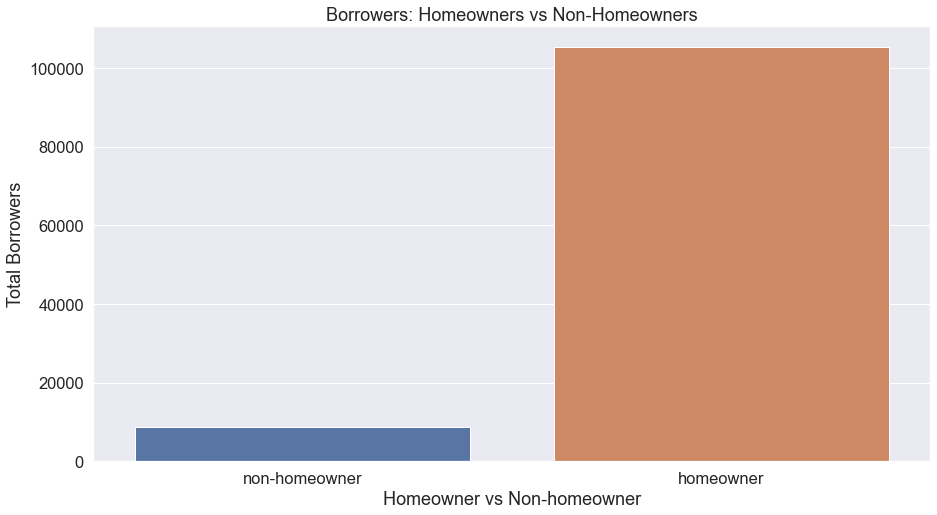

In [31]:
sns.set_theme(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(15,8))

ax1 = sns.barplot(data=homeowners, x='is_borrower_homeowner', y='total_borrowers')


ax1.set_xlabel("Homeowner vs Non-homeowner")
ax1.set_ylabel('Total Borrowers')
ax1.set_title("Borrowers: Homeowners vs Non-Homeowners");

### Now that we've seen several variables describing the borrowers, let's take a look at the loan information across the dataset.

### Exploratory Question #8 - 

>What was the average loan amount?

In [32]:
df['loan_original_amount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: loan_original_amount, dtype: float64

### Visualization #9

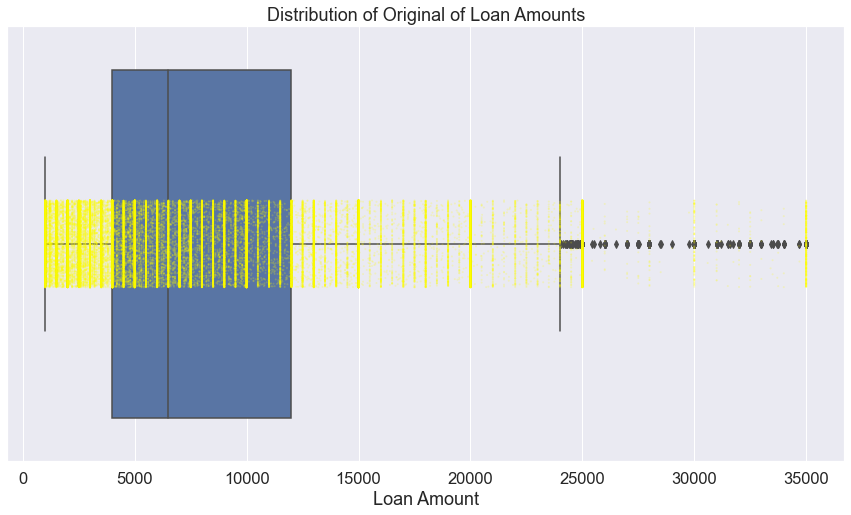

In [33]:
sns.set_theme(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(15,8))

ax1 = sns.boxplot(x=df['loan_original_amount'])
sns.stripplot(x=df['loan_original_amount'], color='yellow', alpha=0.2, size=2)

ax1.set_xlabel("Loan Amount")
ax1.set_title("Distribution of Original of Loan Amounts");

### Observation

> The yellow dots on top of this box plot are the individual datapoints of loan amounts and the box chart is the distribution of loan amounts. The average loan amount was 8,337 and the median loan amount was 6,500.

### Exploratory Question #9 - 

>At the time this data was pulled, how many loans were delinquent?

In [34]:
delinquent_loans = df.groupby(['is_loan_delinquent']).size()

In [35]:
delinquent_loans = pd.DataFrame(delinquent_loans)

In [36]:
delinquent_loans.reset_index(inplace=True)

In [37]:
delinquent_loans.columns=(['is_loan_delinquent', 'number_of_loans'])

In [38]:
delinquent_loans.replace([0,1],['not_delinquent', 'delinquent'], inplace=True)

### Visualization #10

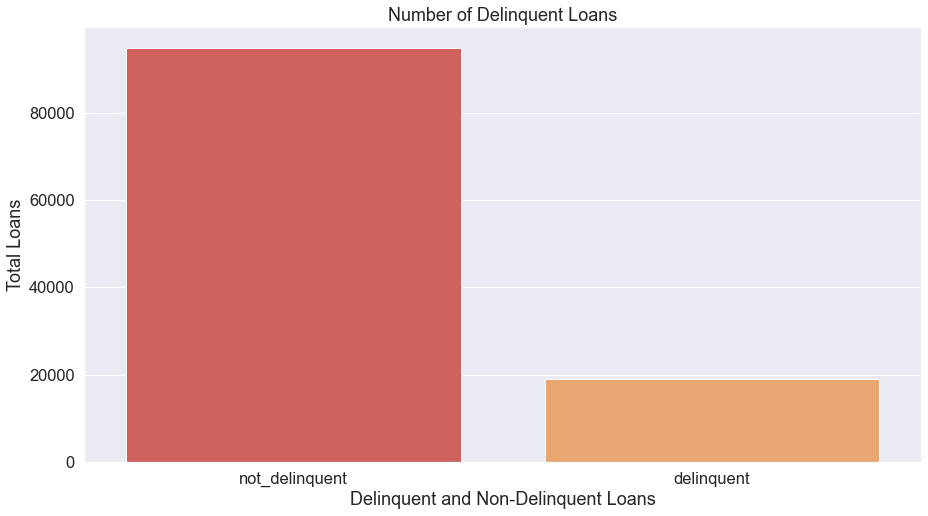

In [39]:
sns.set_theme(style="darkgrid", palette="Spectral", font_scale=1.5)
plt.figure(figsize=(15,8))


ax1 = sns.barplot(data=delinquent_loans, x='is_loan_delinquent', y='number_of_loans')

ax1.set_xlabel("Delinquent and Non-Delinquent Loans")
ax1.set_ylabel('Total Loans')
ax1.set_title("Number of Delinquent Loans");

### Observation

>The majorite of loans were not delinquent when this data was pulled.

### Exploratory Question #10 - 

>What was the distribution of loans in each loan status category at the time this data was pulled? (Loan status categories include: Cancelled, ChargedOff, Completed, Current, Defaulted, FinalPaymentProgress, PastDue). 

In [40]:
loan_statuses = df.groupby(['loan_status']).size()

In [41]:
loan_statuses = pd.DataFrame(loan_statuses)

In [42]:
loan_statuses.reset_index(inplace=True)

In [43]:
loan_statuses.columns=['loan_status', 'number_of_loans']

In [44]:
loan_statuses

,loan_status,number_of_loans
0,Cancelled,5
1,Chargedoff,11992
2,Completed,38074
3,Current,56576
4,Defaulted,5018
5,FinalPaymentInProgress,205
6,Past Due (1-15 days),806
7,Past Due (16-30 days),265
8,Past Due (31-60 days),363
9,Past Due (61-90 days),313


### Visualization #11

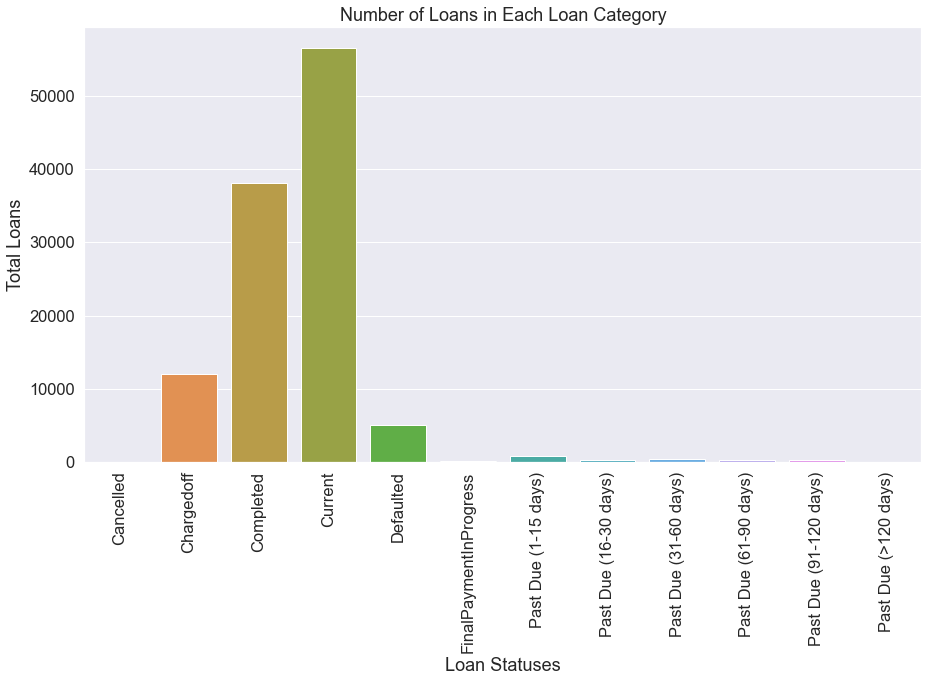

In [45]:
sns.set_theme(style="darkgrid", palette="bright", font_scale=1.5)
plt.figure(figsize=(15,8))


ax1 = sns.barplot(data=loan_statuses, x='loan_status', y='number_of_loans')

ax1.set_xlabel("Loan Statuses")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_ylabel('Total Loans')
ax1.set_title("Number of Loans in Each Loan Category");

### Observation

>Most loans were current, some were completed, and fractions of them were chargedoff, defaulted, or past due.

### Exploratory Question #11 -

>What was the average percentage estimated loss of the original loan amount if the loan is charged off? This loss is estimated at the time the loan is issued.

In [46]:
df['estimated_loss'].describe()

count    84853.000000
mean         0.080306
std          0.046764
min          0.004900
25%          0.042400
50%          0.072400
75%          0.112000
max          0.366000
Name: estimated_loss, dtype: float64

### Visualization #12

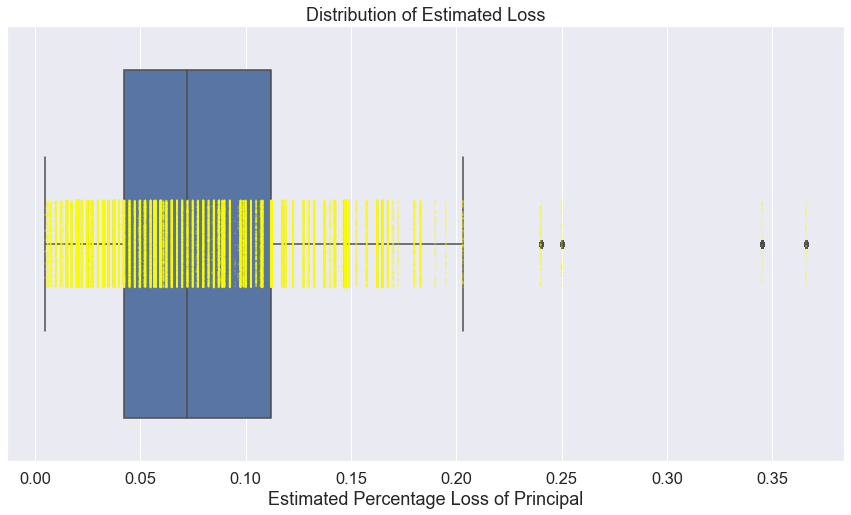

In [47]:
sns.set_theme(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(15,8))

ax1 = sns.boxplot(x=df['estimated_loss'])
sns.stripplot(x=df['estimated_loss'], color='yellow', alpha=0.2, size=2)

ax1.set_xlabel("Estimated Percentage Loss of Principal")
ax1.set_title("Distribution of Estimated Loss");

### Observation

>The average estimated loss if a loan is charged off was 8%. The median estimated loss was 7%.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In some of the graphs, I transformed specific columns by size (count) and made a new dataframe to graph the values. 

I am interested to see how a borrower's credit score influences the estimated loss of the loan, if a borrower's credit score affects their APR, and if their credit score is related to their debt to income ratio.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Most of the cleaning I did on the dataset was performed prior to this exploration in the data_wrangling_and_cleaning.ipynb notebook. 

## Bivariate Exploration

> Now we'll explore relationships between variables in the dataset. 

### Exploratory Question #12 - 

>Is there a relationship between a borrower's credit score and the estimated percentage loss on the loan if it is charged off?

In [48]:
from scipy.stats import pearsonr

In [49]:
credit_loss = df[['estimated_loss','credit_score_range_lower']].copy()

In [50]:
credit_loss.dropna(inplace=True)

In [51]:
pearsonr(credit_loss['estimated_loss'],credit_loss['credit_score_range_lower'])

(-0.5112628168679376, 0.0)

### Visualization #13

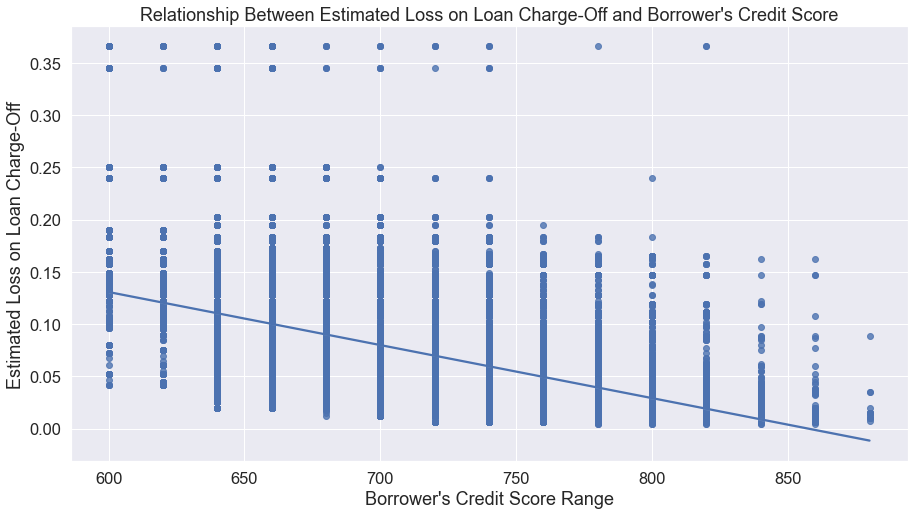

In [52]:
sns.set_theme(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(15,8))

ax1 = sns.regplot(x=credit_loss['credit_score_range_lower'], y=credit_loss['estimated_loss'])


ax1.set_xlabel("Borrower's Credit Score Range")
ax1.set_ylabel("Estimated Loss on Loan Charge-Off")

ax1.set_title("Relationship Between Estimated Loss on Loan Charge-Off and Borrower's Credit Score");

### Observation

>As seen in the regression plot above, there is a moderate (-0.5 correlation coefficient) negative relationship of borrower's credit score and the estimated loss on the loan in case of chargte-off. As seen in the pearsonr calculation above the plot, the correlation coefficient is -0.5 with a p-value of 0, which tells us there is a statistically significant moderate negative relationship between the two values. 

>i.e. When the borrower's credit score goes up, the estimated loss on the loan goes down. 

### Exploratory Question #13 - 

>Is there a relationship between a borrower's credit score and their monthly payment and thier APR (annual interest rate)?

In [53]:
aprs_credit = df[['credit_score_range_lower', 'borrower_a_p_r']].copy()

In [54]:
aprs_credit.dropna(inplace=True)

In [55]:
pearsonr(aprs_credit['credit_score_range_lower'], aprs_credit['borrower_a_p_r'])

(-0.4297073220587668, 0.0)

### Visualization #14 

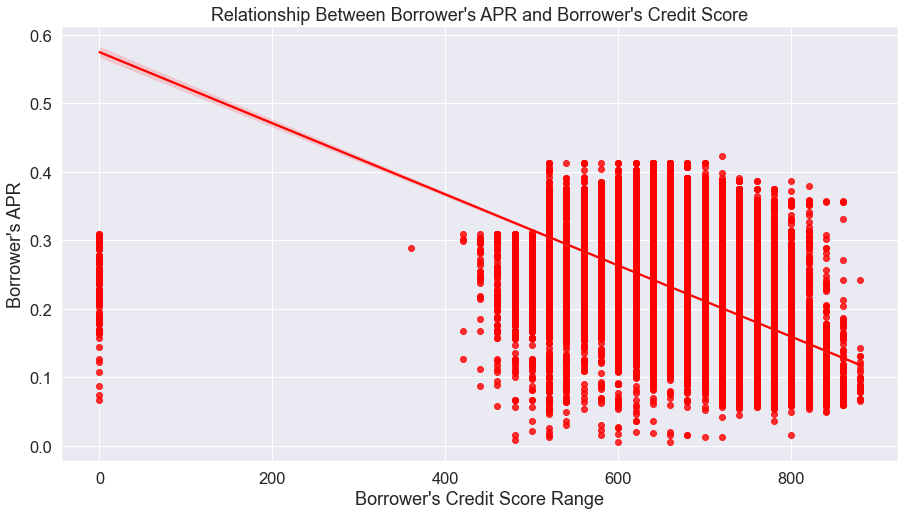

In [56]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,8))

ax1 = sns.regplot(x=aprs_credit['credit_score_range_lower'], y=aprs_credit['borrower_a_p_r'], color="red")


ax1.set_xlabel("Borrower's Credit Score Range")
ax1.set_ylabel("Borrower's APR")

ax1.set_title("Relationship Between Borrower's APR and Borrower's Credit Score");

### Observation

>As seen in the code above, there is a moderate negative relationship between a borrower's APR and their credit score. The pearsonr calculation above the graph showed us a correlation coefficient of -0.4 and a p-value of 0, which indicates the moderate negative correlation is statistically significant. 

>i.e. As the borrower's credit score went up, their APR went down. 

### Exploratory Question #14 - 

>Is there a relationship between a borrower's credit score and their debt to income ratio?

In [57]:
debt_credit = df[['credit_score_range_upper', 'debt_to_income_ratio']].copy()

In [58]:
debt_credit.dropna(inplace=True)

In [59]:
pearsonr(debt_credit['credit_score_range_upper'],debt_credit['debt_to_income_ratio'])

(-0.013168518894298266, 2.0159644022745738e-05)

### Visualization #15

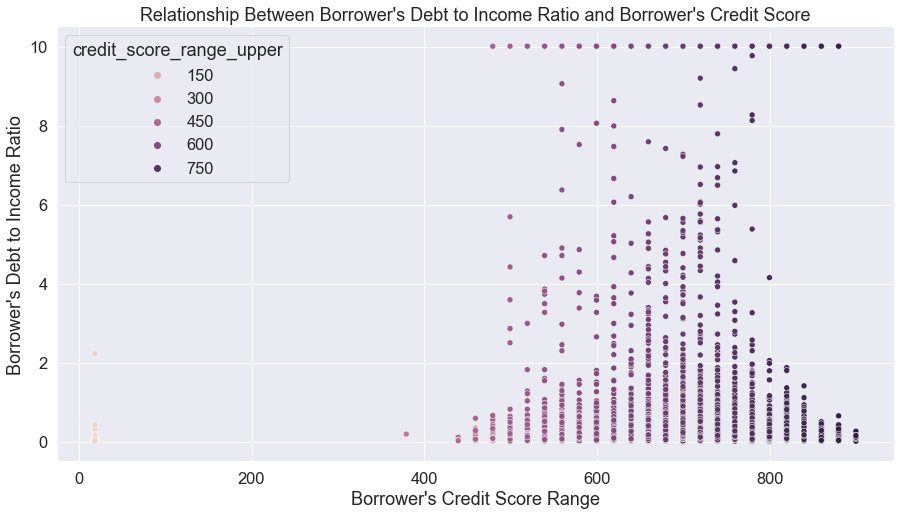

In [60]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,8))

ax1 = sns.scatterplot(x=debt_credit['credit_score_range_upper'], y=debt_credit['debt_to_income_ratio'], hue=debt_credit['credit_score_range_upper'])


ax1.set_xlabel("Borrower's Credit Score Range")
ax1.set_ylabel("Borrower's Debt to Income Ratio")

ax1.set_title("Relationship Between Borrower's Debt to Income Ratio and Borrower's Credit Score");

### Observation

>Based on the pearsonr calculation above the graph and the scatterplot seen above, there does not appear to be any relationship or correlation between a borrower's credit score and their debt to income ratio.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It was interesting to see how a borrower's credit score was correlated to their loan interest rate and to the estimated potential loss on loans.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I was surprised there was no apparent correlation between a borrower's credit score and their debt to income ratio.

## Multivariate Exploration

> We will now take a look at relationships between three or more variables in the loan dataset.

### Exploratory Question #15 - 

>What is the relationship (if any) between the following variables - borrower apr, loan original amount, monthly loan payment, estimated loss, and estimated return?

In [61]:
pairplot_df = df[['borrower_a_p_r', 'loan_original_amount', 'monthly_loan_payment','estimated_loss','estimated_return']].copy()

In [62]:
pairplot_df.dropna(inplace=True)

### Visualization #16

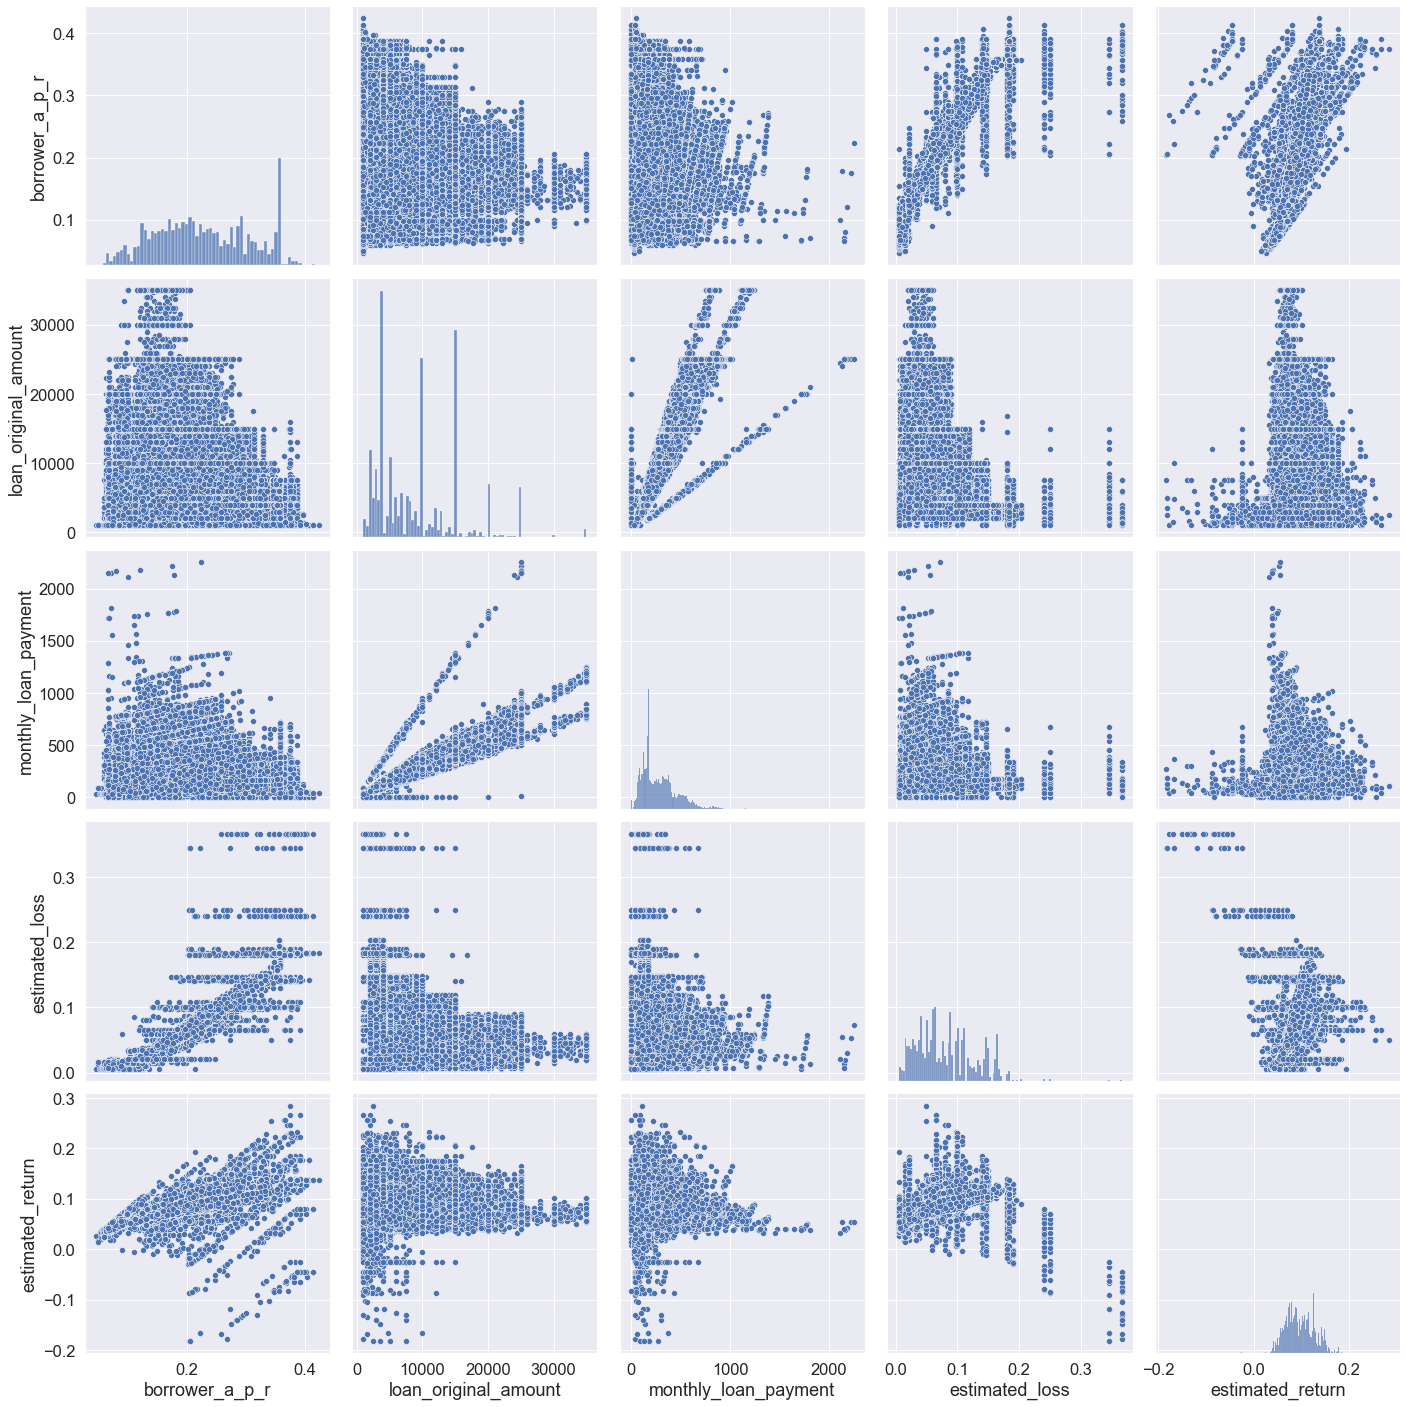

In [63]:
sns.pairplot(pairplot_df, height=4);
plt.show()

### Observation

>The visual relationships that stand out in the pairplots above are a positive relationship between estimated return and borrower apr, a positive relationship between monthly loan payment and loan amount, and negative relationships between estimated loss and monthly loan payment/loan amount.

### Exploratory Question #16 -

>What are the relationships of the borrowers' credit score and loan amount within each income category? To visualize the data more easily, we will only look at the upper four income ranges.

In [64]:
income_categories = df[['income_range', 'monthly_loan_payment', 'loan_original_amount']].copy()

In [65]:
income_categories = income_categories.query('income_range != "Not displayed"')

In [66]:
income_categories = income_categories.query('income_range != "Not employed"')

In [67]:
income_categories = income_categories.query('income_range != "$0"')

In [68]:
income_categories = income_categories.query('income_range != "$1-24,999"')

In [69]:
income_categories

,income_range,monthly_loan_payment,loan_original_amount
0,"$25,000-49,999",330.43,9425
1,"$50,000-74,999",318.93,10000
3,"$25,000-49,999",321.45,10000
4,"$100,000+",563.97,15000
5,"$100,000+",342.37,15000
...,...,...,...
113932,"$50,000-74,999",364.74,10000
113933,"$75,000-99,999",65.57,2000
113934,"$25,000-49,999",273.35,10000
113935,"$25,000-49,999",449.55,15000


### Visualization #17

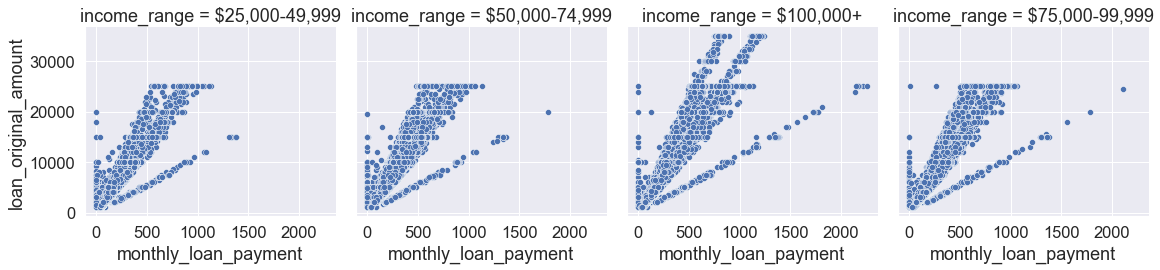

In [70]:
ax = sns.FacetGrid(income_categories, col='income_range', height=4.1)

ax.map(sns.scatterplot, "monthly_loan_payment", "loan_original_amount");

### Observation

>The relationship between loan amount and monthly loan payment seems to stay consistent within each income range.

# Bonus analysis - 

### As I put together this presentation, I had another question about how credit score distributions varied between current loans and default loans, which I explored below:

### Exploratory Question #17 - 

>What was the distribution of borrower credit scores in loan categories of current and defaulted? In loans which were defaulted, were borrower's scores lower on average?

In [102]:
loan_categories_credit = df[['credit_score_range_lower', 'credit_score_range_upper', 'loan_status']].copy()

In [103]:
loan_categories_credit.dropna(inplace=True)

In [104]:
loan_categories_credit = loan_categories_credit.query('loan_status == "Current" or loan_status == "Defaulted"')

In [105]:
loan_categories_credit

,credit_score_range_lower,credit_score_range_upper,loan_status
1,680.0,699.0,Current
3,800.0,819.0,Current
4,680.0,699.0,Current
5,740.0,759.0,Current
6,680.0,699.0,Current
...,...,...,...
113930,680.0,699.0,Current
113931,800.0,819.0,Current
113932,700.0,719.0,Current
113934,700.0,719.0,Current


In [106]:
loan_default = loan_categories_credit.copy()

In [107]:
current_loans = loan_default.query('loan_status == "Current"').copy()

In [108]:
default_loans = loan_categories_credit.query('loan_status == "Defaulted"').copy()

In [109]:
current_loans.describe()

,credit_score_range_lower,credit_score_range_upper
count,56576.000000,56576.000000
mean,698.739748,717.739748
std,44.121902,44.121902
min,600.000000,619.000000
25%,660.000000,679.000000
50%,700.000000,719.000000
75%,720.000000,739.000000
max,880.000000,899.000000


#### For the loans which are current, the borrower credit score distribution ranged from 600-880 (lower range) to 619-899 (upper range). The mean credit scores were 698 (lower range) and 717 (upper range). The median credit scores were 700 (lower range) and 719 (upper range). 

In [111]:
default_loans.describe()

,credit_score_range_lower,credit_score_range_upper
count,4892.000000,4892.000000
mean,620.940311,639.940311
std,107.571162,107.571162
min,0.000000,19.000000
25%,560.000000,579.000000
50%,640.000000,659.000000
75%,680.000000,699.000000
max,860.000000,879.000000


#### For the loans which are defaulted, the borrower credit score distribution ranged from 0-860 (lower range) to 19-879 (upper range). The mean credit scores were 620 (lower range) and 639 (upper range). The median credit scores were 640 (lower range) and 659 (upper range). 

### Visualization #18

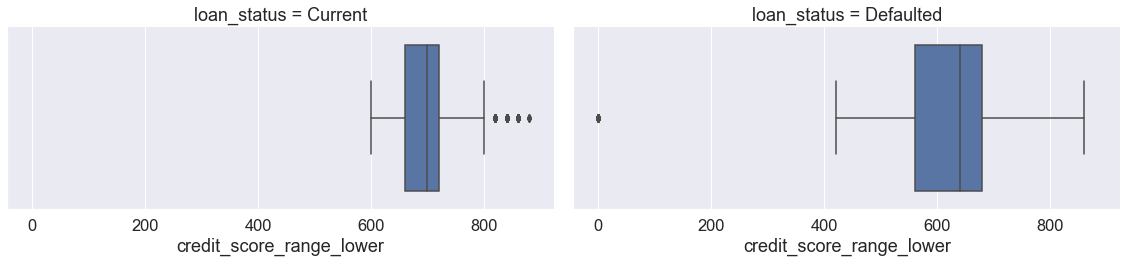

In [75]:
ax1 = sns.FacetGrid(loan_categories_credit, col='loan_status', height=4, aspect=2)

ax1.map(sns.boxplot, "credit_score_range_lower", order=["Defaulted", "Current"]);

### Visualization #19

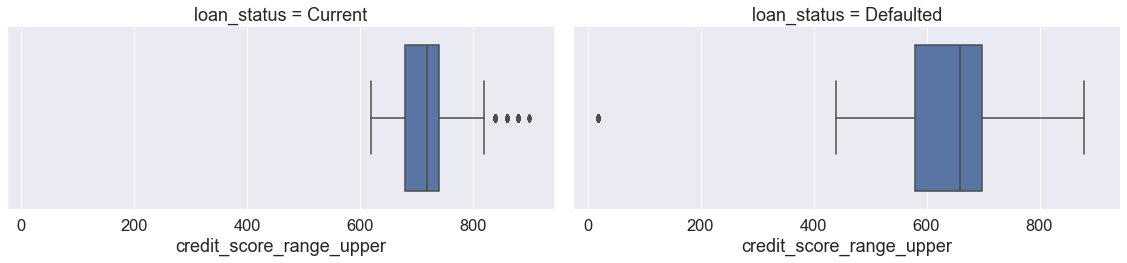

In [76]:
ax1 = sns.FacetGrid(loan_categories_credit, col='loan_status', height=4, aspect=2)

ax1.map(sns.boxplot, "credit_score_range_upper", order=["Defaulted", "Current"]);

### Observation

>From the FacetGrid box plots, it is clear the distribution of borrower's credit scores is higher where loan statuses are current and lower where loan statuses are default. 

## Conclusions
>The visualizations of features throughout this dataset made it much easier to get an idea of the relationship between the features. In addition, the visualizations helped get a feel for the data overall both for borrower information and loan information.
